In [1]:
from __future__ import absolute_import, division, print_function

#TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#Helper libraries for label standarisation
from sklearn.preprocessing import OneHotEncoder

#Helper libraries for fiture standaritaion
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv("Data_baru.csv")
data

ParserError: Error tokenizing data. C error: Expected 1 fields in line 5, saw 2


#Load Leaf Dataset from Glcm feature
Code di atas berfungsi untuk membaca dataset berbentuk csv yang merupakan data feature dari 7 kelas daun yang telah diekstraksi.

Untuk membaca data di sini digunakan librari pandas

In [3]:
x = data[['energy90', 'contras90', 'homogenity90',
       'correlation90']]

#Standarissasi nilai homogenity
sc = StandardScaler()
x[['homogenity90']] = sc.fit_transform(x[['homogenity90']])

/home/napisang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/napisang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/home/napisang/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user

Code diatas berfungsi untuk mengambil data feature Daun dari file csv yang sudah dibaca sebelumnya dengan mengambil nomo kolom fiture secara spesifict. Hal ini diperlukan untuk memisahkan data input dengan data label untuk Klasifikasi nanti.

Dalam data hasil ekstraksi fiture "homogenity" terdapat data feature yang bernilai lebih dari 1, maka diperlukan standarisasi nilai "homogenity" tersebut agar berada dibawah atau sama dengan 1.

Hal ini diperlukan karena ANN sendiri hanya menerima input dibawah sama dengan 1.

In [4]:
y = data[["Class"]]

# Standarisasi label kelas
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

/home/napisang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Code di atas berfungsi untuk mengambil label kelas dari masing masing data daun yang sudah diekstraksi yang ada pada file csv yang sudah dibaca sebelumnya.
Dimana data kelas daun tersebut terdapat 7 kelas dengan dilabelkan 0,1,2,3,4,5, dan 6. Sebelum masuk ke dalam kelasifikasi label tersebut harus di encode terlebih dulu agar mepresentasikan 0 dan 1 sehingga nantinya dapat di kalkulasi dengan ANN.

In [77]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.10)
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, y_test, 
                                                    test_size=0.25, 
                                                    random_state=42)

print('x_train : ',x_train.shape)
print('x_test  : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test  : ', y_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [1000, 286, 29]

## Split data for training and testing
Code di atas berfungsi untuk memisahkan training dan testing untuk kebutuhan konowledge untuk ANN serta untuk testingnya. Untuk perbandingannya sendiri di sini menggunakan perbandinga 90:10. Untuk masing masing data training dan testingnya.

In [49]:
model = keras.Sequential()
model.add(keras.layers.Dense(12, input_dim=4, activation="relu"))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(12, activation="relu"))
model.add(keras.layers.Dense(7, activation="softmax"))

#Create ANN model
Code diatas berfungsi untuk membuat model ANN untuk klasifikasi. Model ANN yang dibuat disini harus sesuai dengan kebutuhan sesuai data yang akan diklasifikasi. 

Model ANN untuk data yang akan diklasifikasi disini yaitu ANN dengan 4 layer input, dan 2 hiden layer masing masing berjumlah 16 dan 12, serta 7 layer ouput. 

Untuk Activation function pada  masing masing hiden layer menggunakan "relu" sedangkan untuk output layer menggunakan "softmax"

In [68]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Code di atas berfungsi untuk mengatur untuk model ANN sebelumnya. Dimana yang di atur disini adalah fungsi optimasi yang digunakan, loss function yang digunakan, serta mengatur agar saat training berjalan record akurasi serta waktu belajar per epoch dapat diperlihatkan.

Untuk optimizer digunakan fungsi "adam"
Untuk loss function digunakan "categorical_crossentropy"

In [69]:
my_model = model.fit(x_train, y_train, batch_size=64, epochs=1000)

# my_model = model.fit(np.array(x_train), y_train, epochs=1000, batch_size=35)



# my_model = model.fit(x_train, y_train_encoded, 
#                      validation_data=(x_test, y_test_encoded),
#                      batch_size=32, 
#                      epochs=20)



Train on 257 samples
Epoch 1/1000
257/257 [==============================] - 1s 3ms/sample - loss: 0.2130 - accuracy: 0.9183
Epoch 2/1000
257/257 [==============================] - 0s 360us/sample - loss: 0.2076 - accuracy: 0.9261
Epoch 3/1000
257/257 [==============================] - 0s 306us/sample - loss: 0.2110 - accuracy: 0.9222
Epoch 4/1000
257/257 [==============================] - 0s 266us/sample - loss: 0.2067 - accuracy: 0.9222
Epoch 5/1000
257/257 [==============================] - 0s 171us/sample - loss: 0.2119 - accuracy: 0.9183
Epoch 6/1000
257/257 [==============================] - 0s 317us/sample - loss: 0.2081 - accuracy: 0.9261
Epoch 7/1000
257/257 [==============================] - 0s 256us/sample - loss: 0.2037 - accuracy: 0.9300
Epoch 8/1000
257/257 [==============================] - 0s 207us/sample - loss: 0.2037 - accuracy: 0.9339
Epoch 9/1000
257/257 [==============================] - 0s 173us/sample - loss: 0.2139 - accuracy: 0.9183
Epoch 10/1000
257/257 [====

Code di atas berfungsi untuk melakukan fiting atau pembelajaran pada model ANN yang telah dibuat, dimana pembelajaran di sini dilakukan sebanyak 10 epoch dengan batch size sebesar 35. Maknanya salam 1 kali epoch model ANN belajar/mengulang selama 35 kali.

In [70]:
test_loss, test_acc = model.evaluate(np.array(x_test),  np.array(y_test), verbose=2)

print('\nTest accuracy:', test_acc)

29/1 - 0s - loss: 1.0806 - accuracy: 0.6897

Test accuracy: 0.6896552


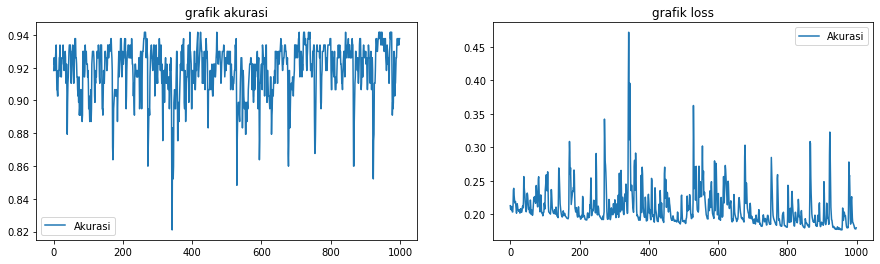

In [71]:
akurasi = my_model.history['accuracy']
# val_akurasi = my_model.history['val_acc']

loss = my_model.history['loss']
# val_loss = my_model.history['val_loss']

x = np.arange(len(akurasi))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('grafik akurasi')
plt.plot(x, akurasi, label='Akurasi')
# plt.plot(x, val_akurasi, label='val_akurasi')
plt.legend()

plt.subplot(1,2,2)
plt.title('grafik loss')
plt.plot(x, loss, label='Akurasi')
# plt.plot(x, val_loss, label='val_akurasi')
plt.legend()

plt.show()

Code di atas berfungsi untuk melihat akurasi dari akurasi dari model ANN yang telah dibuat untuk melakukan prediksi. Di sini data yang digunakan adalah data testing yang sudah di dapat sebelumnya.

Dimana yang dapat kita lihat dari ouput code di atas yaitu besar akurasi testingnya sebesar sekitar 89 %, dengan nilai loss sekkitar 30%.

In [29]:
predictions = model.predict(np.array(x_test))

In [42]:
predict_value = []
expected_value = []

for i in range(len(predictions)-1):
  predict_value.append(np.argmax(predictions[0]))
  expected_value.append(np.argmax(y_test[0]))

In [61]:
from sklearn.metrics import r2_score
r2_score(np.array(expected_value), np.array(predict_value))

1.0

In [72]:
model.evaluate(x_test)

ValueError: Cannot create an execution function which is comprised of elements from multiple graphs.

In [73]:
from sklearn.metrics import classification_report
akurasi = model.evaluate(x_test, y_test)[0]
loss = model.evaluate(x_test, y_test)[1]
print()
print('akurasi : %.2f%%' % akurasi)
print('loss    : %.2f%%' % loss)
print()
print(classification_report(y_test.argmax(axis = 1), prediksi))

ValueError: Cannot create an execution function which is comprised of elements from multiple graphs.